# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Load data
file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/heights_weights.csv"
df = pd.read_csv(file_name)
df.head()

,Height,Weight,Male
0,73.847017,241.893563,1
1,68.781904,162.310473,1
2,74.110105,212.740856,1
3,71.730978,220.042470,1
4,69.881796,206.349801,1


In [2]:
df.shape

(10000, 3)

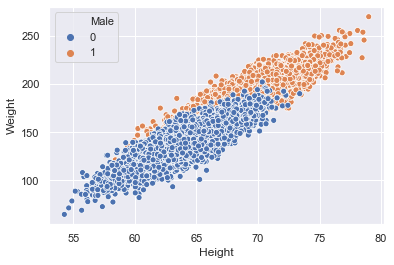

In [3]:
#Plotting our data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
ax = sns.scatterplot(x='Height', y='Weight', hue='Male', data=df)

In [4]:
#Extract the columns that we will use for the data
x = df.iloc[:, 0:2].values
y = df.iloc[:, 2].values

In [5]:
x

array([[ 73.84701702, 241.89356318],
       [ 68.78190405, 162.31047252],
       [ 74.11010539, 212.74085556],
       ...,
       [ 63.86799221, 128.47531878],
       [ 69.03424313, 163.85246135],
       [ 61.94424588, 113.64910268]])

In [6]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [7]:
#Split data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [8]:
#Fit Logistic Regression model
model = LogisticRegression(C=1e40, solver='newton-cg')
fitted_model = model.fit(X_train, y_train)

In [9]:
# Predict based on height (inches) and weight (lbs)
height =61
weight = 100

#Get prediction
prediction = model.predict([(height, weight)])

if prediction[0]:
    result = 'Male'
else:
    result = 'Female'
print("Person is ",result)

Person is  Female


### Displaying our theta parameter values

![alt text](https://miro.medium.com/max/2220/1*siWAvCzFy2zp81pDNoa4UA.png)

In [10]:
#We have three values of theta

#For theta 0
print(fitted_model.intercept_)

#For theta 1 and theta 2
print(fitted_model.coef_)

[-0.03019374]
[[-0.49519206  0.20348748]]


[(-5.0, 5.0), Text(0, 0.5, '$X_2$'), (-5.0, 5.0), Text(0.5, 0, '$X_1$'), None]

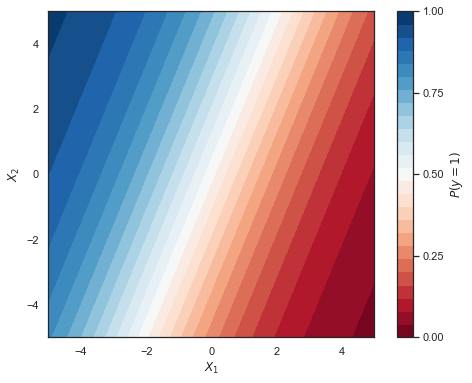

In [11]:
#Create Logistic Regression plot
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

sns.set(style='white')
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap='RdBu', vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label('$P(y = 1)$')
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.scatter(X_train[100:,0], X_train[100:, 1], c=y_train[100:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect='equal', xlim=(-5,5), ylim=(-5,5), xlabel="$X_1$", ylabel="$X_2$")

[(-5.0, 5.0), Text(0, 0.5, '$X_2$'), (-5.0, 5.0), Text(0.5, 0, '$X_1$'), None]

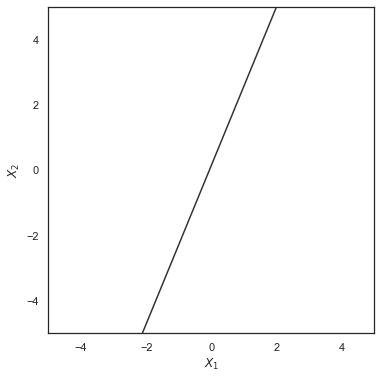

In [12]:
f, ax = plt.subplots(figsize=(8, 6))
ax.contour(xx, yy, probs, levels=[.5],cmap='Greys', vmin=0, vmax=.6)

ax.scatter(X_train[100:, 0], X_train[100:, 1], c=y_train[100:], s=50,
          cmap='RdBu', vmin=-.2, vmax=1.2,
          edgecolor='white', linewidth=1)

ax.set(aspect='equal', xlim=(-5, 5), ylim=(-5, 5), xlabel="$X_1$", ylabel="$X_2$")